### Retail Industry: Big Sales Mart

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and find out the sales of each product at a particular store.** Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
# import the customary libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv(r"D:\Exploratory Data Analysis\Big mart sales\train_v9rqX0R.csv")
test=pd.read_csv(r"D:\Exploratory Data Analysis\Big mart sales\test_AbJTz2l.csv")
sub=pd.read_csv(r"D:\Exploratory Data Analysis\Big mart sales\sample_submission_8RXa3c6 (1).csv")
sales=pd.concat([train,test],ignore_index=True)

In [3]:
# preview the data
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


#### Observations

* Item Outlet Sales is the target variable. It means that the company is interested in finding the sales.
* The rest of the variables are predictor variables.
* Predictor Variables are those vars that help predict the target.


### Univariate Analysis:: Tgt

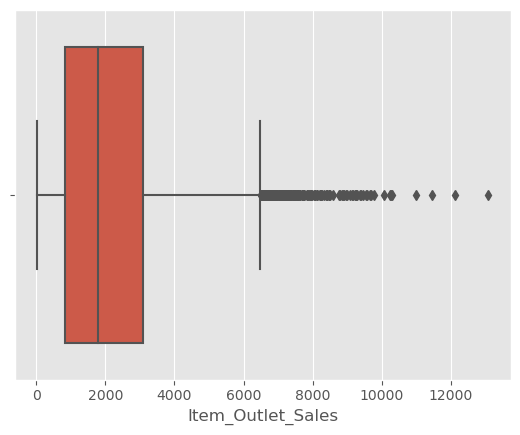

In [4]:
plt.style.use('ggplot')
sns.boxplot(sales.Item_Outlet_Sales)
plt.show()

# One can use Boxplot to see the Outliers in the Data...



* It simply represents that the data is not Normal.


In [5]:
# Summary Statistics of the Data
sales.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [6]:
sales.Item_Outlet_Sales.skew()

1.1775306028542796

In [7]:
sales.info() # information on the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


###  Univariate Analysis

In [8]:
# Find the List of Numerical Columns
sales.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

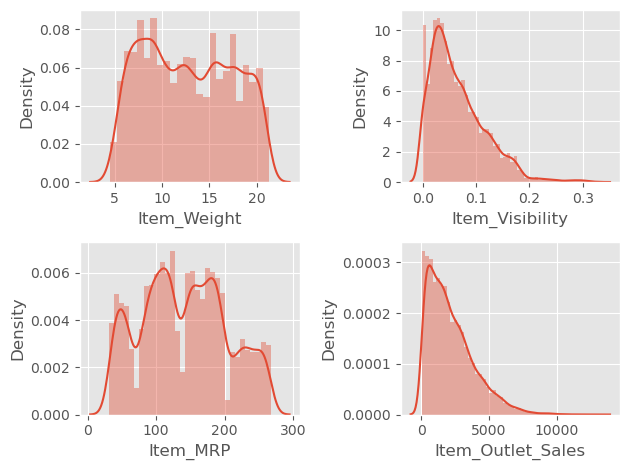

In [9]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
 'Item_Outlet_Sales']
#len(num_cols)
nrows = 2
ncols = 2
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(sales.loc[:, i])
    iterator+=1 # print all the plots
    
plt.tight_layout()
plt.show()


**INFERENCES :**
* Item weights are Uniformally distributed.
* The Item Visibility is right skewed, therefore there might be outliers, that is, some extra large items on the selling menu.
* Item MRP seems to have some missing values.
* Item outlet sales is right skewed, that is there might be some exceptionally large sales values. 

In [10]:
sales.select_dtypes(include = "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

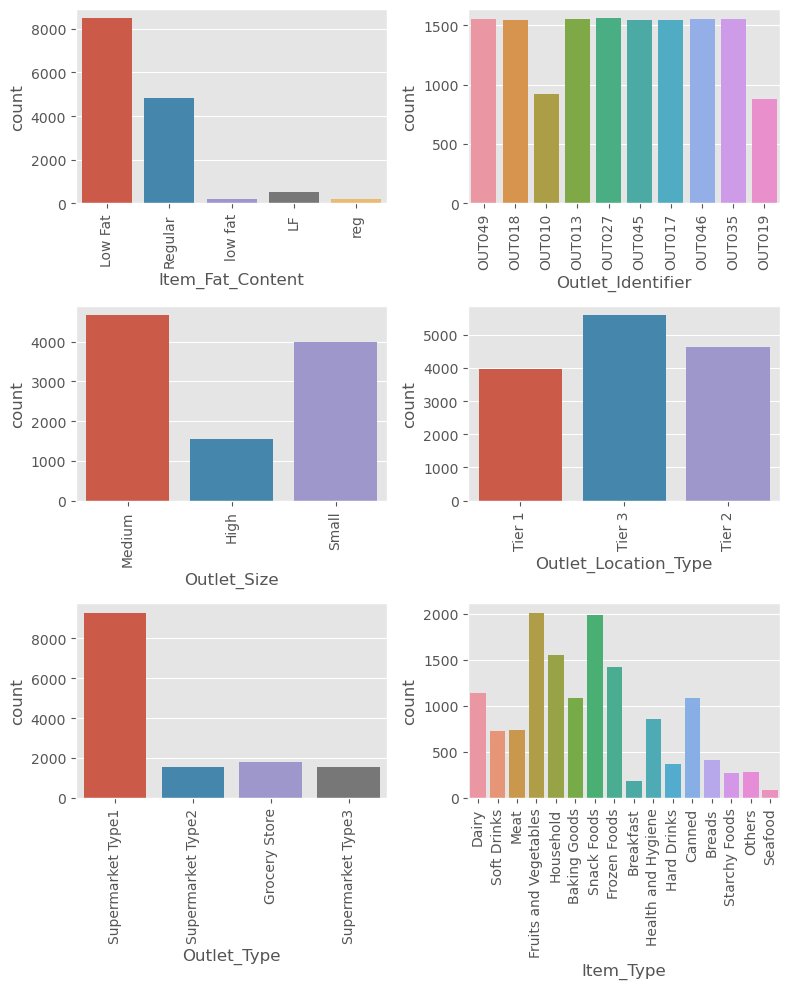

In [11]:
cat_cols = ['Item_Fat_Content', 'Outlet_Identifier',
       'Outlet_Size', 
            'Outlet_Location_Type', 'Outlet_Type', 'Item_Type']
nrows = 3
ncols = 2
repeater = 1
plt.figure(figsize=(8,10))
for i in cat_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.countplot(sales.loc[:, i])
    plt.xticks(rotation = 90)
    repeater = repeater+1
plt.tight_layout()
plt.show()


**INFERENCES:**
* Low Fat Items are more popular than regular items.
* Snack Foods and Fruits and Vegetables are the highest selling Items. Whereas Seafood and Breakfast sell the least.
* Outlet 10 and 19 are least performing outlets.
* Maximum outlets are Medium size and High Size outlets are minimum.
* Maximum outlets are in Tier 3 Cities.
* Maximum outlets were setup in either 1985.
* Maximum Outlets are SuperMarket Type1.

<AxesSubplot:>

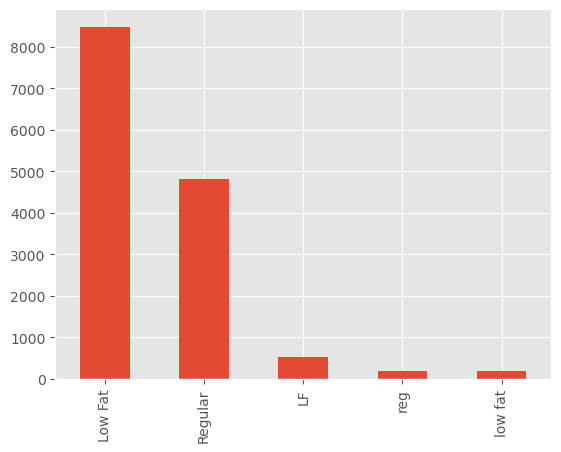

In [12]:
sales.Item_Fat_Content.value_counts().plot(kind = "bar")

In [13]:
# Fixing the Item Fat Content
sales.Item_Fat_Content.replace(to_replace = ["LF", "low fat", "reg"],
                              value = ["Low Fat", "Low Fat", "Regular"],
                              inplace  =True)

In [14]:
# Check the High Freq Outlet
sales.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [15]:
sales.loc[sales.Outlet_Identifier=="OUT027", 
          "Item_Outlet_Sales"].describe()

count      935.000000
mean      3694.038558
std       2127.760054
min        241.685400
25%       2044.338900
50%       3364.953200
75%       4975.523400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

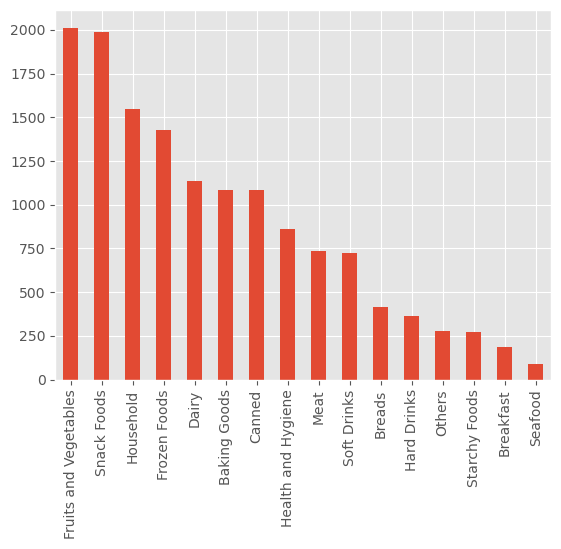

In [16]:
# Item Type
sales.Item_Type.value_counts().plot(kind = "bar")

# Top 5: Fruits and Veggies, Dairy, Household Frozen & Snacks..

#### Observations

* Average Sales comes out to be 2100 Dollars
* Most Selling Products are Fruits and Veggies, Dairy, Household Frozen & Snacks.
* Most Visible Outlet in the Business is OUT027
* Most of the Outlets are based in **Tier3** Cities and are **Medium** Sized Outlets.
* Most of the Items Selling in Business are **Low Fat** items
* We also observed that Item Visibility is highly skewed and has lots of 0s.


### Bivariate Analysis - num vs tgt

In [17]:
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

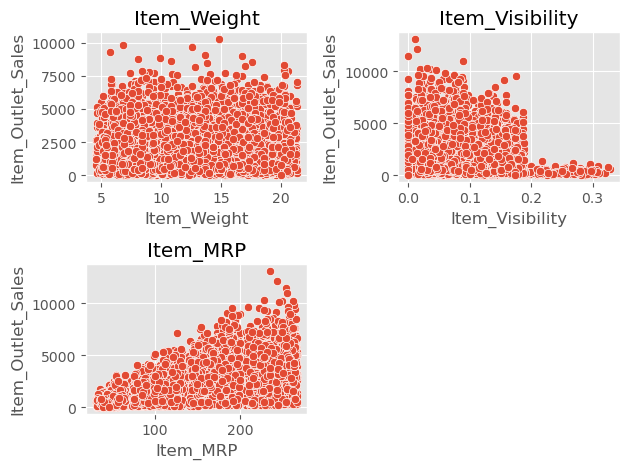

In [18]:
nrows = 2
ncols = 2
iterator = 1

for i in num_cols[:-1]:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(sales.loc[:, i], sales.Item_Outlet_Sales)
    iterator = iterator+1
    plt.title(i)
    
plt.tight_layout()
plt.show()

**INFERENCES :**
* Increase in Item Visibility somehow impacts the Item Outlet Sales. They Increase till a point.
* As the Item Price increases, It shows the sales inccrease, that is high MRP means high sales price value.

### Relationship between Numerical Vars

In [19]:
# Item Weight vs Sales
sales.loc[:, ["Item_Visibility", "Item_Outlet_Sales"]].cov()

,Item_Visibility,Item_Outlet_Sales
Item_Visibility,0.002648,-1.132561e+01
Item_Outlet_Sales,-11.325611,2.912141e+06


<AxesSubplot:>

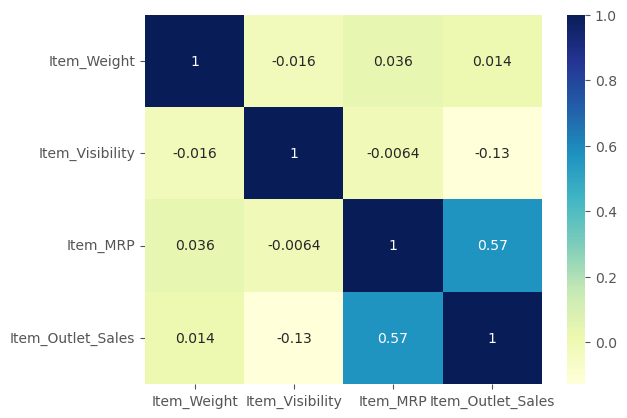

In [20]:
# Correlation for the whole data...
sns.heatmap(sales.loc[:, num_cols].corr(), annot = True, 
            cmap ="YlGnBu")

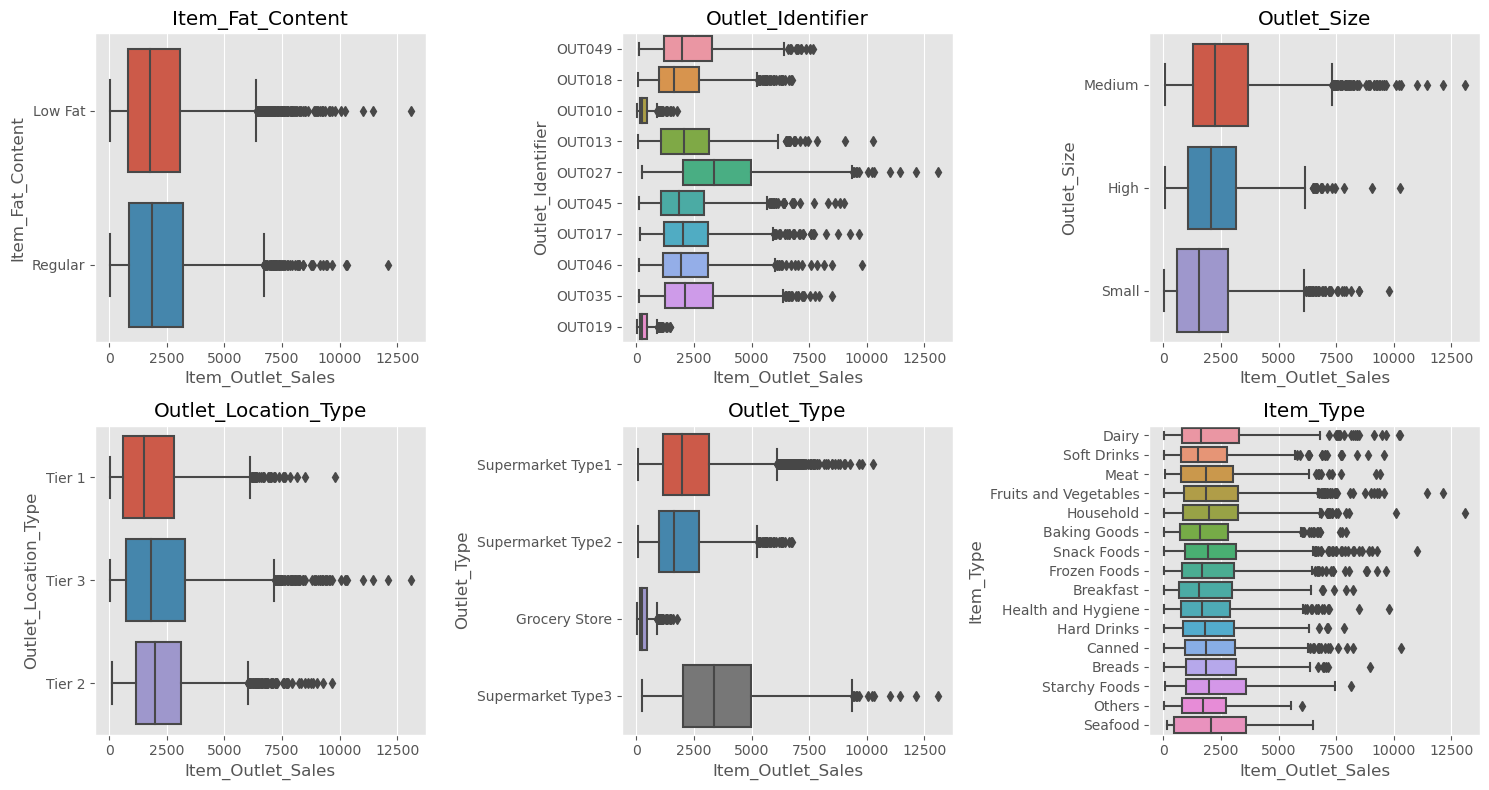

In [21]:
# Cat vs Number::Boxplot
plt.figure(figsize=(15,8))
nrows = 2
ncols = 3
rep = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, rep)
    sns.boxplot(y=sales.loc[:, i], x = sales.Item_Outlet_Sales)
    plt.title(i)
    rep+=1
    
plt.tight_layout()
plt.show()

**INFERENCES :**
* The seafood items were sold for specific prices, no outliers were noticed.
* Dairy and Starchy Foods have highest range in sales prices.
* Outlet 27 was best performing outlet whereas Outlet 10 and 19 were the worst performing outlets.
* Outlets with Medium size and Tier 3 have a higher range of sales.
* Outlet Established in 1998 were among the worst performing outlets. Whereas Outlets established in 1985 has the highest range of sales.
* Grocery Store are not performing well where as Supermarket Type 3 has the highest range of sales.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

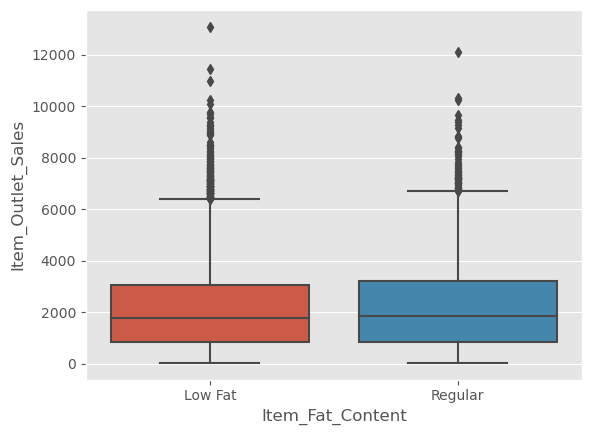

In [22]:
sns.boxplot(sales.Item_Fat_Content, sales.Item_Outlet_Sales)

# Low Fat Content has higher sales than the Regular Content

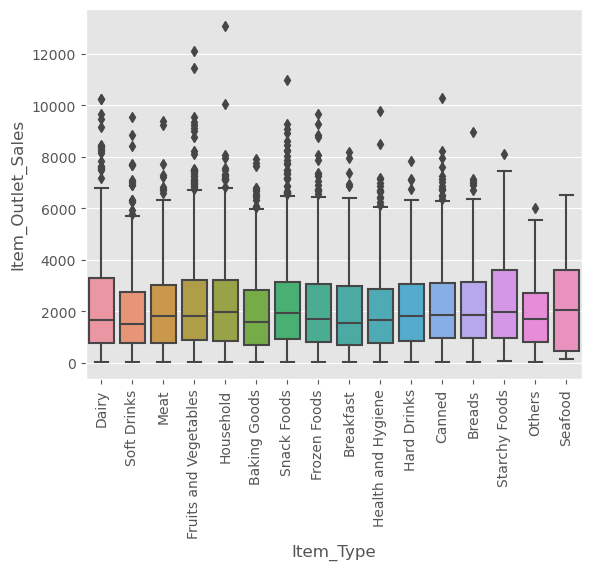

In [23]:
sns.boxplot(sales.Item_Type, sales.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.show()

# Low Fat Content has higher sales than the Regular Content

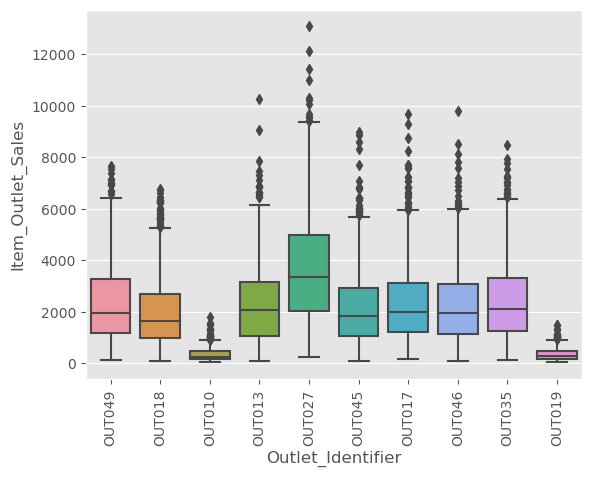

In [24]:
sns.boxplot(sales.Outlet_Identifier, sales.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.show()

# Worst Performing Outlets are Out10 and Out19

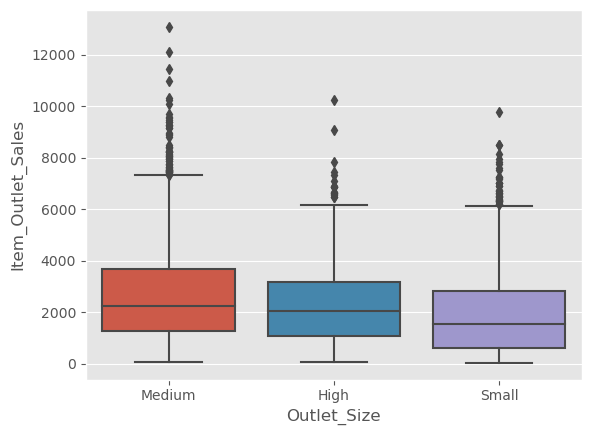

In [25]:
sns.boxplot(sales.Outlet_Size, sales.Item_Outlet_Sales)
#plt.xticks(rotation = 90)
plt.show()

# Medium Outlets have the Highest Sales followed by High Spaced

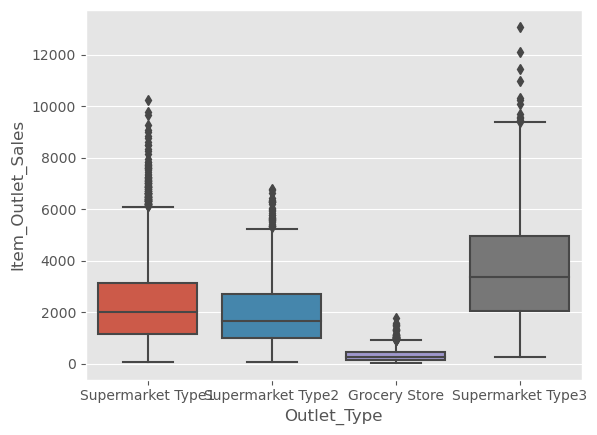

In [26]:
sns.boxplot(sales.Outlet_Type, sales.Item_Outlet_Sales)
#plt.xticks(rotation = 90)
plt.show()

# S3 and S1 command the highest Sales in the business...

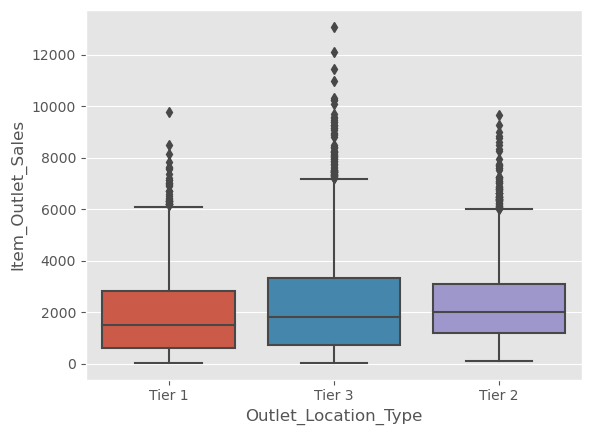

In [27]:
sns.boxplot(sales.Outlet_Location_Type, sales.Item_Outlet_Sales)
#plt.xticks(rotation = 90)
plt.show()

# Tier 3 commands the highest Sales in the business...

In [28]:
# Missing Values
sales.isnull().sum() # np.NaN 

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### Missing Values

In [29]:
sales.loc[sales.Item_Weight.isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [30]:
# Pattern using Item Fat Content...
sales.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [31]:
# Find the Mean Weight where the Item Fat Content is Low Fat

sales.loc[sales.Item_Fat_Content=="Low Fat" , "Item_Weight"].median()

12.65

In [32]:
sales.loc[sales.Item_Fat_Content=="Regular" , "Item_Weight"]

1         5.920
3        19.200
5        10.395
6        13.650
8        16.200
          ...  
14198    13.000
14199    10.500
14200     7.600
14202    15.300
14203     9.500
Name: Item_Weight, Length: 5019, dtype: float64

In [33]:
# Item Weight basis Item Type
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [34]:
# Groupby
sales.groupby("Item_Type")["Item_Weight"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,900.0,12.275211,4.744906,4.880,8.300,11.650,15.75,20.85
Breads,343.0,11.152362,4.632099,4.635,6.710,10.500,14.80,20.85
Breakfast,152.0,13.179112,5.217283,6.425,8.060,11.600,18.60,21.10
Canned,898.0,12.340830,4.625382,4.615,8.115,12.150,16.50,21.35
Dairy,941.0,13.238358,4.662724,4.805,8.930,13.300,17.50,20.70
Frozen Foods,1175.0,12.569323,4.512750,4.555,8.895,12.300,16.20,20.85
Fruits and Vegetables,1667.0,13.194406,4.567869,5.460,8.985,13.100,17.00,21.35
Hard Drinks,303.0,11.576205,4.229816,4.610,8.365,10.195,15.00,19.70
Health and Hygiene,710.0,13.171739,4.551038,5.175,9.695,12.350,17.60,21.25


In [35]:
# Item ID
sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [36]:
sales.loc[sales.Item_Identifier=="DRG01", "Item_Weight"]

544      14.8
1218     14.8
3005      NaN
5974      NaN
8522     14.8
10383    14.8
10871    14.8
11785    14.8
13927    14.8
Name: Item_Weight, dtype: float64

In [37]:
sales.loc[sales.Item_Type=="Dairy", "Item_Weight"]

0         9.300
11       18.500
19       13.350
28        5.925
30       19.250
          ...  
14143    10.895
14154    18.500
14172    17.250
14179       NaN
14188       NaN
Name: Item_Weight, Length: 1136, dtype: float64

In [38]:
# We will deal with Missing Values basis the Item Identifier...

sales["Item_Weight"] = sales.groupby("Item_Identifier")["Item_Weight"].apply(lambda x:x.fillna(x.median()))

In [39]:
sales.loc[sales.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [40]:
sales.loc[sales.Item_Type=="Dairy", 
          "Item_Weight"].median()

13.3

In [41]:
sales.loc[927, "Item_Weight"] = 12.85
sales.loc[1922, "Item_Weight"] = 13.15
sales.loc[4187, "Item_Weight"] = 13.35

In [42]:
sales.isnull().sum()[sales.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [43]:
# Item Visibility
dict_visible = sales.groupby("Item_Identifier")
dict_visible=sales.groupby('Item_Identifier')["Item_Visibility"].median().to_dict()

In [44]:
sales["Item_Visibility"] = sales.groupby("Item_Identifier")["Item_Visibility"].apply(lambda x:x.replace(0, x.median()))

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

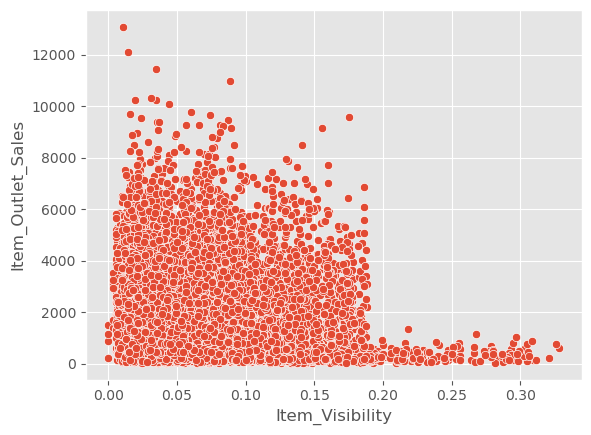

In [45]:
# Check if 0s are dealt with
sns.scatterplot(sales.Item_Visibility, sales.Item_Outlet_Sales)

### Outlet Size

In [46]:
sales.loc[sales.Outlet_Size.isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [47]:
sales.groupby(["Outlet_Location_Type", "Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [48]:
# Grocery Store and Tier 3
sales.loc[(sales.Outlet_Location_Type=="Tier 3") & 
          (sales.Outlet_Type=="Grocery Store") & 
          (sales.Outlet_Size.isnull()), "Outlet_Size"]="Small" 

In [49]:
sales.loc[(sales.Outlet_Location_Type=="Tier 2") & 
          (sales.Outlet_Type=="Supermarket Type1") & 
          (sales.Outlet_Size.isnull()), "Outlet_Size"]="Small"

In [50]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### Outlier Identification

In [51]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.794040,0.070022,141.004977,1997.830681,2181.288914
std,4.651537,0.049847,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.031239,94.012000,1987.000000,834.247400
50%,12.600000,0.057655,142.247000,1999.000000,1794.331000
75%,16.750000,0.097356,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [52]:
# print the summary statistic of the Data ~ target variable
print("Mean: ", sales.Item_Outlet_Sales.mean())
print("Median: ", sales.Item_Outlet_Sales.median())
print("Mode: ", sales.Item_Outlet_Sales.mode())

Mean:  2181.2889135750365
Median:  1794.331
Mode:  0    958.752
Name: Item_Outlet_Sales, dtype: float64


In [53]:
# Print the Quartiles...
print("Q1: ", sales.Item_Outlet_Sales.quantile(0.25))
print("Q2: ", sales.Item_Outlet_Sales.quantile(0.50))
print("Q3: ", sales.Item_Outlet_Sales.quantile(0.75))

Q1:  834.2474
Q2:  1794.331
Q3:  3101.2964


In [54]:
sales.quantile(0.25)

Item_Weight                     8.710000
Item_Visibility                 0.031239
Item_MRP                       94.012000
Outlet_Establishment_Year    1987.000000
Item_Outlet_Sales             834.247400
Name: 0.25, dtype: float64

In [55]:
# Coefficient of Variation

import scipy.stats as stats # Statistical Library

In [56]:
stats.variation(sales.select_dtypes(include = np.number))

array([0.36355783, 0.71184393, 0.44030185, 0.00419023,        nan])

In [57]:
def cov(x):
    mean_x = np.mean(x)
    std_x = np.std(x)
    return(std_x/mean_x)

In [58]:
cov(sales.select_dtypes(include = np.number))

Item_Weight                  0.363558
Item_Visibility              0.711844
Item_MRP                     0.440302
Outlet_Establishment_Year    0.004190
Item_Outlet_Sales            0.782290
dtype: float64

In [59]:
q1 = sales.quantile(0.25)
q2 = sales.quantile(0.50)
q3 = sales.quantile(0.75)

iqr = q3 -q1
upper_lim = q3 +1.5*iqr
lower_lim = q1 -1.5*iqr

In [60]:
upper_lim

Item_Weight                    28.810000
Item_Visibility                 0.196532
Item_MRP                      323.621000
Outlet_Establishment_Year    2029.500000
Item_Outlet_Sales            6501.869900
dtype: float64

In [61]:
sales.loc[~(sales>upper_lim).any(axis = 1)].shape

(13766, 12)

In [62]:
# Condition for Removal of Outlier
wt_outliers = sales.loc[~(sales>upper_lim).any(axis = 1)]

<AxesSubplot:xlabel='Item_Outlet_Sales'>

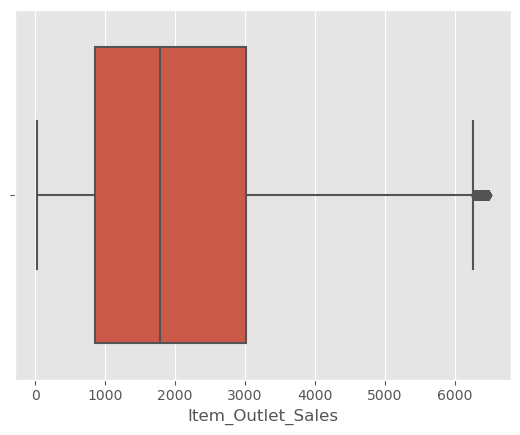

In [63]:
sns.boxplot(wt_outliers.Item_Outlet_Sales)

In [64]:
sales.max()

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                       Regular
Item_Visibility                       0.328391
Item_Type                        Starchy Foods
Item_MRP                              266.8884
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Size                              Small
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                   13086.9648
dtype: object

In [65]:
wt_outliers.max()

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                       Regular
Item_Visibility                       0.196491
Item_Type                        Starchy Foods
Item_MRP                              266.8884
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Size                              Small
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                     6478.234
dtype: object

In [66]:
# Check the Outliers for Item Outlet Sales only...
q1 = sales.Item_Outlet_Sales.quantile(0.25)
q3 = sales.Item_Outlet_Sales.quantile(0.75)
iqr = q3 - q1

upper_lim = q3+1.5*iqr

In [67]:
sales.loc[sales.Item_Outlet_Sales>upper_lim]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,12.00,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,12.15,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.60,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,10.30,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.20,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,13.00,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.00,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.35,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,Small,Tier 2,Supermarket Type1,7588.1226


In [68]:
lower_lim

Item_Weight                    -3.350000
Item_Visibility                -0.067938
Item_MRP                      -43.753400
Outlet_Establishment_Year    1961.500000
Item_Outlet_Sales           -2566.326100
dtype: float64

In [69]:
sales.Item_Outlet_Sales.skew()

1.1775306028542796

In [70]:
wt_outliers.Item_Outlet_Sales.skew()

0.7687469857773416

### Feature Engineering


In [71]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [72]:
# Extracting First Two Letters of Item ID
ids =[]
for i in sales.Item_Identifier:
    ids.append(i[:2])

In [73]:
sales["Item_ID_Cat"] = pd.Series(ids)

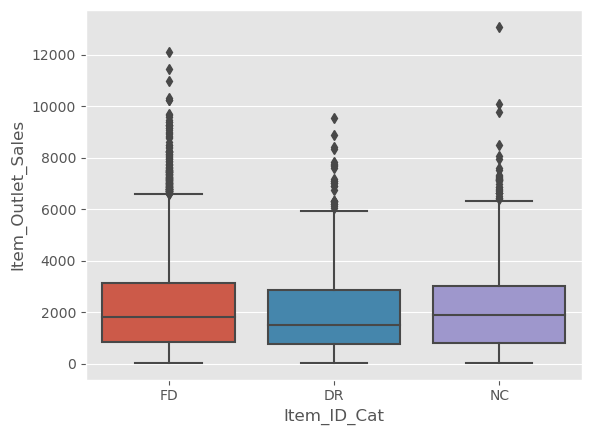

In [74]:
# Boxplot of Item ID Cat vs Sales
sns.boxplot(x = "Item_ID_Cat", 
            y = "Item_Outlet_Sales", data = sales)
plt.show()

In [75]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [76]:
# Where the Id Cat is NC => Item Fat Content => Non Edible
sales.loc[sales.Item_ID_Cat=="NC", 
          "Item_Fat_Content"] = "Non Edible"

In [77]:
sales.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non Edible    2686
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

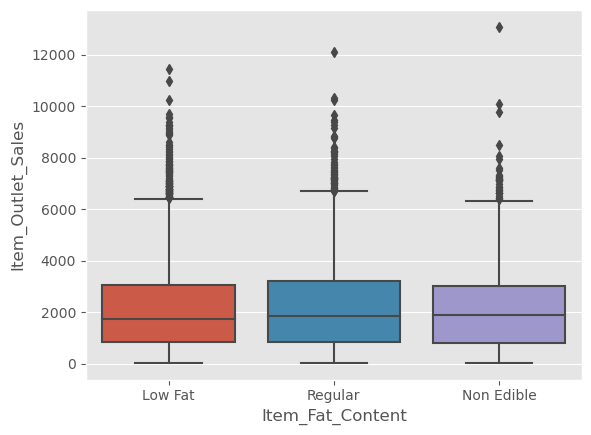

In [78]:
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales",
           data = sales)

In [79]:
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [80]:
perishables = ['Dairy', 'Meat', "Fruits and Vegetables", 
              "Breakfast","Breads", "Starchy Foods", "Seafood"]

In [81]:
def barbaad(x):
    if x in perishables:
        return("Perishable")
    else:
        return("Non Perishable")

In [82]:
sales["Prod_Cat"] = sales.Item_Type.apply(barbaad)

<AxesSubplot:xlabel='Prod_Cat', ylabel='Item_Outlet_Sales'>

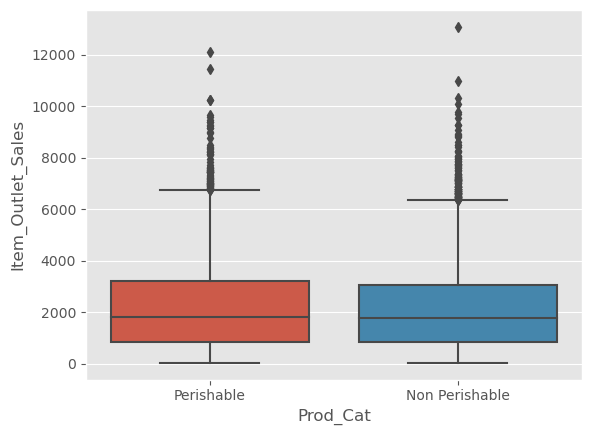

In [83]:
sns.boxplot(x = "Prod_Cat", y = "Item_Outlet_Sales",
           data = sales)

In [84]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Prod_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishable
4,NCD19,8.93,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable


In [85]:
# Price per Unit
sales["Price_Per_Unit"] = sales.Item_MRP/sales.Item_Weight

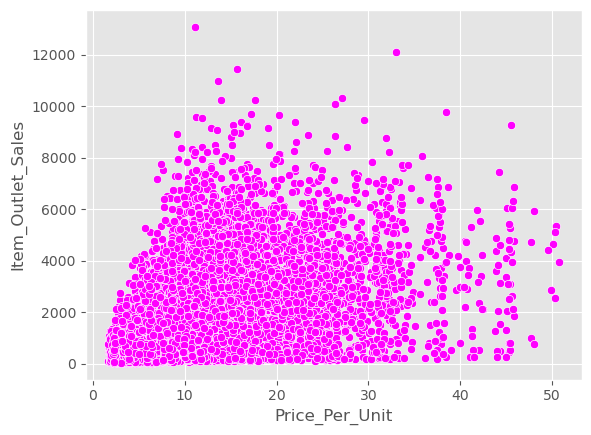

In [86]:
sns.scatterplot(x = "Price_Per_Unit", y = "Item_Outlet_Sales",
               data = sales, color = "magenta")
plt.show()

In [87]:
# Outlet ID
sales.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()

# 27, 35, 49

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [88]:
best = ["OUT027", "OUT035", "OUT049"]
worst = ["OUT019", "OUT010"]
def outlets(x):
    if x in best:
        return("Best")
    elif x in worst:
        return("Poor")
    else:
        return("Good")

In [89]:
sales["Outlets"] = sales.Outlet_Identifier.apply(outlets)

<AxesSubplot:xlabel='Outlets', ylabel='Item_Outlet_Sales'>

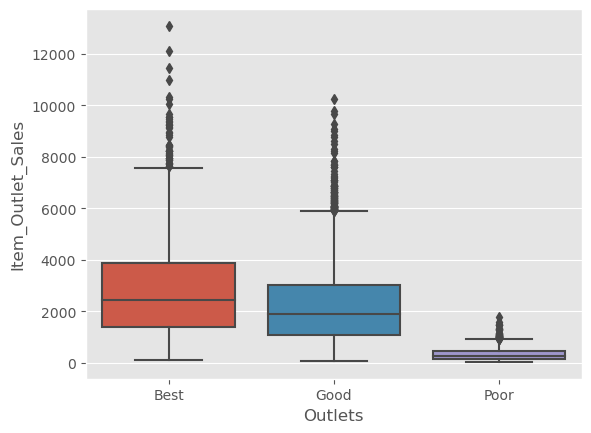

In [90]:
sns.boxplot(x ="Outlets", y = "Item_Outlet_Sales", data = sales)

In [91]:
# 2013 Sales Data
sales["Outlet_Vintage"] = 2013 - sales.Outlet_Establishment_Year

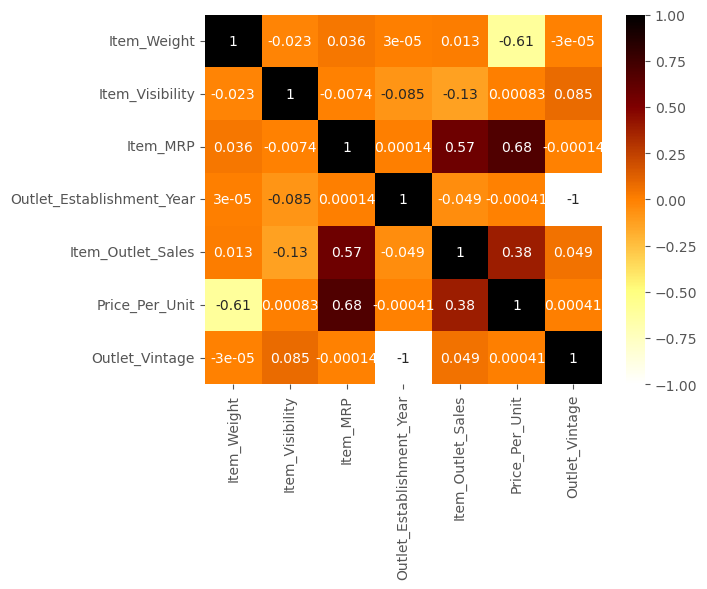

In [92]:
sns.heatmap(sales.corr(), annot = True, cmap = "afmhot_r")
plt.show()

In [93]:
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Prod_Cat,Price_Per_Unit,Outlets,Outlet_Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,26.861204,Best,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,8.153581,Good,4


### Categorical Variable Treatment:: Encoding


In [94]:
dict_out = sales.Outlet_Identifier.value_counts().to_dict()

In [95]:
sales["Outlet_Freq"] = sales.Outlet_Identifier.map(dict_out)

In [96]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Prod_Cat,Price_Per_Unit,Outlets,Outlet_Vintage,Outlet_Freq
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,26.861204,Best,14,1550
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,8.153581,Good,4,1546
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,8.092457,Best,14,1550
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishable,9.484115,Poor,15,925
4,NCD19,8.93,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,6.031512,Good,26,1553


In [97]:
# Correlation
sales.loc[:, ["Outlet_Freq", "Item_Outlet_Sales"]].corr()

,Outlet_Freq,Item_Outlet_Sales
Outlet_Freq,1.000000,0.415482
Item_Outlet_Sales,0.415482,1.000000


In [98]:
# Item Type - Frequency Encoding
dict_items = sales.Item_Type.value_counts().to_dict()

In [99]:
sales["Item_Type_Freq"] = sales.Item_Type.map(dict_items)

In [100]:
dict_items

{'Fruits and Vegetables': 2013,
 'Snack Foods': 1989,
 'Household': 1548,
 'Frozen Foods': 1426,
 'Dairy': 1136,
 'Baking Goods': 1086,
 'Canned': 1084,
 'Health and Hygiene': 858,
 'Meat': 736,
 'Soft Drinks': 726,
 'Breads': 416,
 'Hard Drinks': 362,
 'Others': 280,
 'Starchy Foods': 269,
 'Breakfast': 186,
 'Seafood': 89}

In [101]:
# Target encoding involves encoding of Cat basis the TG
tgt_encode = sales.groupby("Outlet_Identifier")['Item_Outlet_Sales'].median().to_dict()

In [102]:
sales["outlet_tgt"] = sales.Outlet_Identifier.map(tgt_encode)

In [103]:
# Correlation
sales.loc[:, ["outlet_tgt", "Item_Outlet_Sales"]].corr()

,outlet_tgt,Item_Outlet_Sales
outlet_tgt,1.000000,0.489391
Item_Outlet_Sales,0.489391,1.000000


In [104]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Prod_Cat,Price_Per_Unit,Outlets,Outlet_Vintage,Outlet_Freq,Item_Type_Freq,outlet_tgt
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,26.861204,Best,14,1550,1136,1966.1074
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,8.153581,Good,4,1546,726,1655.1788
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,8.092457,Best,14,1550,736,1966.1074
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishable,9.484115,Poor,15,925,2013,250.3408
4,NCD19,8.93,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,6.031512,Good,26,1553,1548,2050.6640


In [105]:
# Drop the Unnecessary Columns

newsales = sales.drop(["Item_Identifier", 
                       "Item_Type", "Outlet_Identifier"], axis = 1)

In [106]:
# One Hot Encoding
pd.get_dummies(newsales, drop_first = True).shape

(14204, 24)

In [107]:
# Label Encoding
sales.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [108]:
outlet_s = {"Small":1, "Medium":2, "High":3}

sales.Outlet_Size.map(outlet_s)

0        2
1        2
2        2
3        1
4        3
        ..
14199    1
14200    2
14201    1
14202    1
14203    1
Name: Outlet_Size, Length: 14204, dtype: int64

In [109]:
# Sklearn Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # machine instance has been created

In [110]:
sales["Outlet_Labels"] = le.fit_transform(sales.Outlet_Size)

In [111]:
sales.loc[:, ["Outlet_Size", "Outlet_Labels"]]

,Outlet_Size,Outlet_Labels
0,Medium,1
1,Medium,1
2,Medium,1
3,Small,2
4,High,0
...,...,...
14199,Small,2
14200,Medium,1
14201,Small,2
14202,Small,2


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

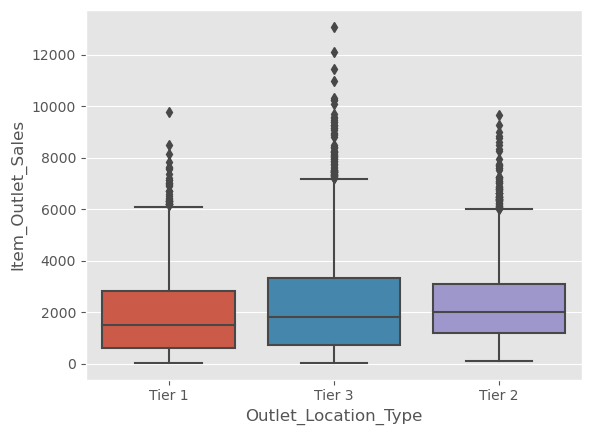

In [112]:
sns.boxplot(x = "Outlet_Location_Type", 
            y = "Item_Outlet_Sales", data = sales)

### Scaling

In [113]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [114]:
localdf = sales.loc[:, ["Item_MRP", 
                        "Item_Weight", "Item_Visibility"]]

In [115]:
sc = StandardScaler() # Zscore Transformation
mmax = MinMaxScaler() # Normalization...

scaled_data = sc.fit_transform(localdf)

In [116]:
pd.DataFrame(scaled_data, columns = localdf.columns).mean()

Item_MRP          -1.391374e-16
Item_Weight       -3.697877e-16
Item_Visibility    1.559346e-17
dtype: float64

### Train Test Split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
# Define X and y
X = newsales.drop("Item_Outlet_Sales", axis = 1)
dummy_x = pd.get_dummies(X, drop_first = True)
y = newsales.Item_Outlet_Sales

In [119]:
xtrain, xtest, ytrain, ytest = train_test_split(dummy_x, y, 
                                                test_size = 0.20,
                                               random_state = 0)

In [120]:
print("xtrain: ", xtrain.shape)
print("ytrain: ", ytrain.shape)
print("xtest: ", xtest.shape)
print("ytest: ", ytest.shape)

xtrain:  (11363, 23)
ytrain:  (11363,)
xtest:  (2841, 23)
ytest:  (2841,)
